In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('global_housing_market_extended.csv')
df

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


In [58]:
missing_values = df.isnull().sum()
print(missing_values)


Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64


In [59]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r"[()%]", "", regex=True)
df

,Country,Year,House_Price_Index,Rent_Index,Affordability_Ratio,Mortgage_Rate_,Inflation_Rate_,GDP_Growth_,Population_Growth_,Urbanization_Rate_,Construction_Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520


C:\Users\NOOR\AppData\Local\Temp\ipykernel_14580\1004988776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_index, x="Country", y="House_Price_Index", palette="coolwarm")


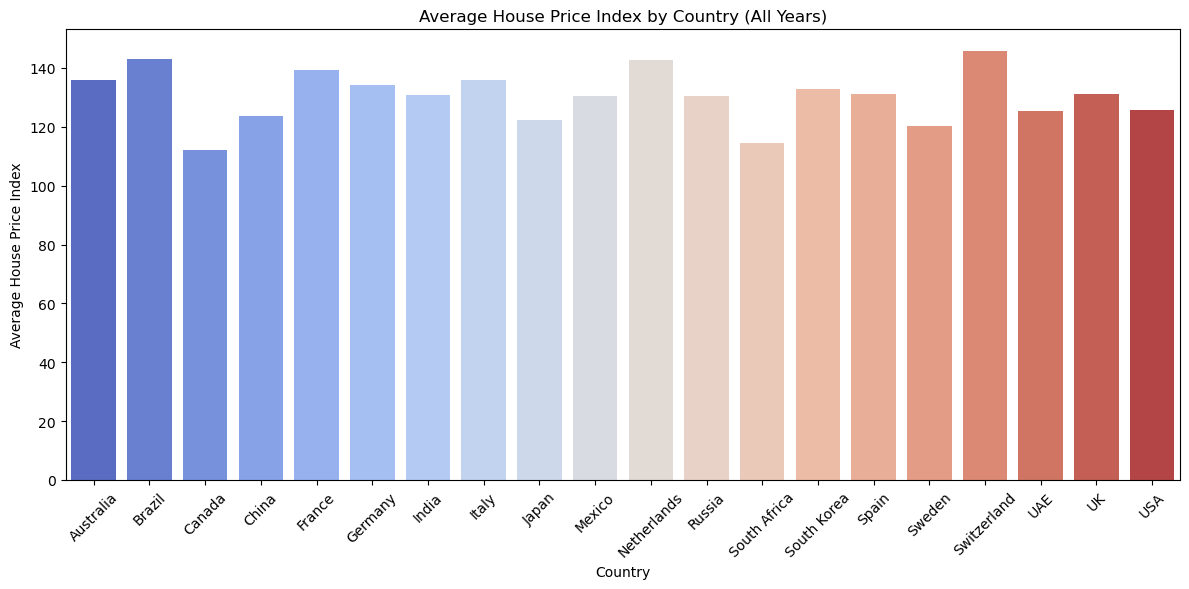

In [60]:
avg_index = df.groupby("Country")["House_Price_Index"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_index, x="Country", y="House_Price_Index", palette="coolwarm")
plt.title("Average House Price Index by Country (All Years)")
plt.ylabel("Average House Price Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


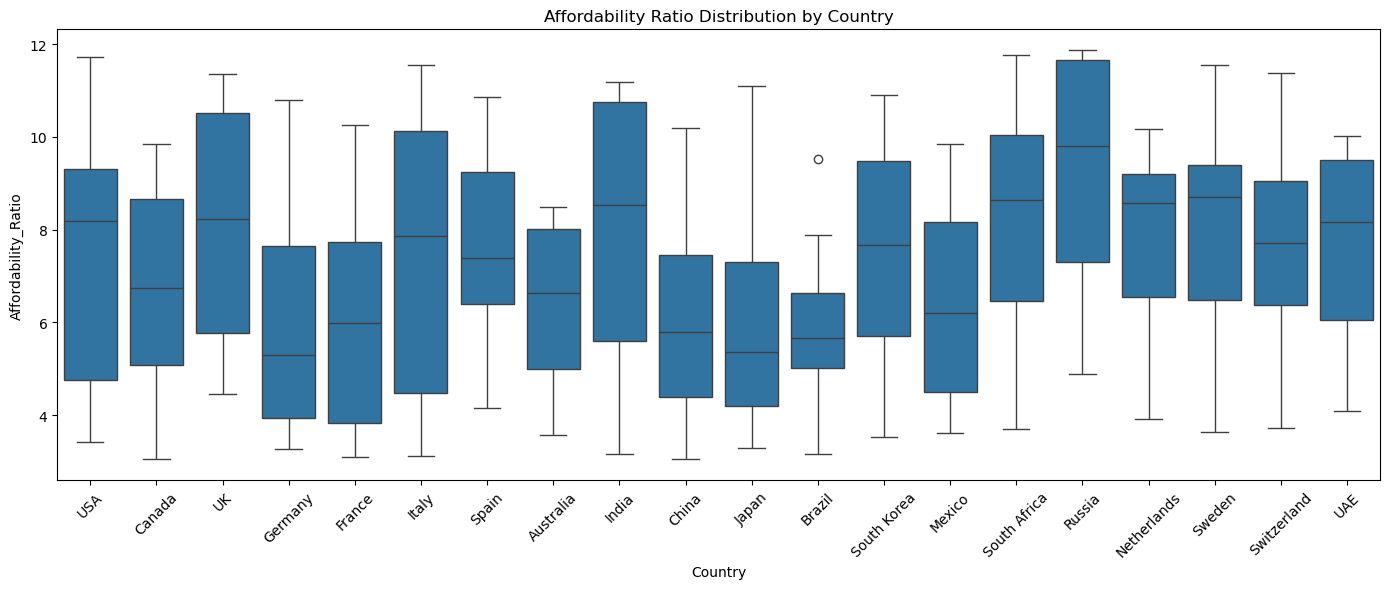

In [61]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Country", y="Affordability_Ratio")
plt.xticks(rotation=45)
plt.title("Affordability Ratio Distribution by Country")
plt.tight_layout()
plt.show()



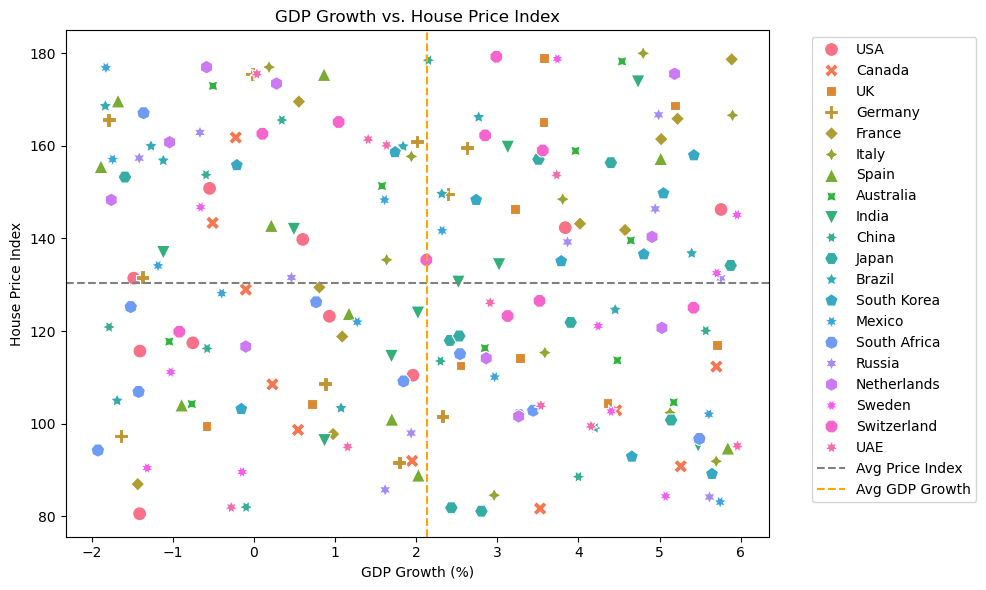

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GDP_Growth_", y="House_Price_Index", hue="Country", style="Country", s=100)
plt.title("GDP Growth vs. House Price Index")
plt.xlabel("GDP Growth (%)")
plt.ylabel("House Price Index")
plt.axhline(df["House_Price_Index"].mean(), color='gray', linestyle='--', label='Avg Price Index')
plt.axvline(df["GDP_Growth_"].mean(), color='orange', linestyle='--', label='Avg GDP Growth')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#High GDP and low price index ==good opprtunity

In [63]:
df['Investment_Score'] = (
    df['GDP_Growth_'] * 1.5 
    - df['Mortgage_Rate_'] * 1.0 
    - df['Inflation_Rate_'] * 0.5 
    - df['Affordability_Ratio'] * 0.8
    + df['Urbanization_Rate_'] * 0.2)

avg_scores = df.groupby("Country")["Investment_Score"].mean().sort_values(ascending=False).reset_index()


C:\Users\NOOR\AppData\Local\Temp\ipykernel_14580\2186069626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores, x="Investment_Score", y="Country", palette="viridis")


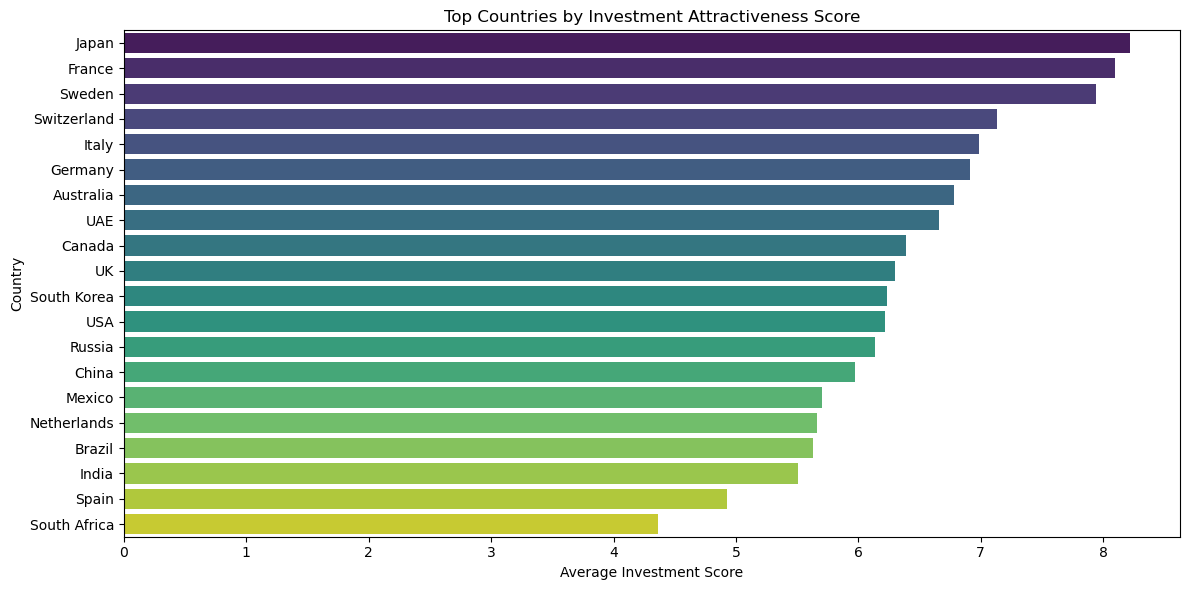

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_scores, x="Investment_Score", y="Country", palette="viridis")
plt.title("Top Countries by Investment Attractiveness Score")
plt.xlabel("Average Investment Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [65]:
df.columns


Index(['Country', 'Year', 'House_Price_Index', 'Rent_Index',
       'Affordability_Ratio', 'Mortgage_Rate_', 'Inflation_Rate_',
       'GDP_Growth_', 'Population_Growth_', 'Urbanization_Rate_',
       'Construction_Index', 'Investment_Score'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [67]:
features = ['GDP_Growth_', 'Mortgage_Rate_', 'Inflation_Rate_', 
            'Affordability_Ratio', 'Urbanization_Rate_']
target = 'Investment_Score'

In [68]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [70]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")

Model RMSE: 1.27


In [71]:
future_years = range(2025, 2031)
future_data = df.groupby('Country')[features].mean().reset_index()

In [72]:
simulated_future = []
for year in future_years:
    temp = future_data.copy()
    temp['Year'] = year
    temp['GDP_Growth_'] += 0.5  # slight growth trend
    temp['Mortgage_Rate_'] -= 0.1
    temp['Inflation_Rate_'] += 0.2
    temp['Affordability_Ratio'] += 0.1
    temp['Urbanization_Rate_'] += 0.3
    temp['Investment_Score_Predicted'] = model.predict(temp[features])
    simulated_future.append(temp)

In [73]:
future_predictions = pd.concat(simulated_future).reset_index(drop=True)


In [74]:
top_future = future_predictions.sort_values(by='Investment_Score_Predicted', ascending=False).head(10)
print("\nTop Future Investment Scores (2025–2030):")
print(top_future[['Country', 'Year', 'Investment_Score_Predicted']])


Top Future Investment Scores (2025–2030):
    Country  Year  Investment_Score_Predicted
84   France  2029                    9.820431
104  France  2030                    9.820431
64   France  2028                    9.820431
24   France  2026                    9.820431
44   France  2027                    9.820431
4    France  2025                    9.820431
15   Sweden  2025                    9.258546
115  Sweden  2030                    9.258546
75   Sweden  2028                    9.258546
35   Sweden  2026                    9.258546


In [75]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Model R² Score: {r2:.2f}")


Model R² Score: 0.93
